<a href="https://www.kaggle.com/code/lillynguyen0510/abalone-age-prediction?scriptVersionId=183373087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "playground-series-s4e4"

# Load the dataset

In [2]:
train_data = read_csv('/kaggle/input/playground-series-s4e4/train.csv', show_col_types = FALSE)
test_data = read_csv('/kaggle/input/playground-series-s4e4/test.csv', show_col_types = FALSE)

In [3]:
head(train_data)
head(test_data)

id Sex Length Diameter Height Whole weight Whole weight.1 Whole weight.2
1 0  F   0.550  0.430    0.150  0.7715       0.3285         0.1465        
2 1  F   0.630  0.490    0.145  1.1300       0.4580         0.2765        
3 2  I   0.160  0.110    0.025  0.0210       0.0055         0.0030        
4 3  M   0.595  0.475    0.150  0.9145       0.3755         0.2055        
5 4  I   0.555  0.425    0.130  0.7820       0.3695         0.1600        
6 5  F   0.610  0.480    0.170  1.2010       0.5335         0.3135        
  Shell weight Rings
1 0.2400       11   
2 0.3200       11   
3 0.0050        6   
4 0.2500       10   
5 0.1975        9   
6 0.3085       10

id    Sex Length Diameter Height Whole weight Whole weight.1 Whole weight.2
1 90615 M   0.645  0.475    0.155  1.2380       0.6185         0.3125        
2 90616 M   0.580  0.460    0.160  0.9830       0.4785         0.2195        
3 90617 M   0.560  0.420    0.140  0.8395       0.3525         0.1845        
4 90618 M   0.570  0.490    0.145  0.8740       0.3525         0.1865        
5 90619 I   0.415  0.325    0.110  0.3580       0.1575         0.0670        
6 90620 M   0.560  0.425    0.140  0.8105       0.3525         0.1915        
  Shell weight
1 0.3005      
2 0.2750      
3 0.2405      
4 0.2350      
5 0.1050      
6 0.2150

# Data Cleaning and Exploratory Data Analysis

## Data Cleaning

In [4]:
# Check data types and dimension
str(train_data)
str(test_data)

spc_tbl_ [90,615 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id            : num [1:90615] 0 1 2 3 4 5 6 7 8 9 ...
 $ Sex           : chr [1:90615] "F" "F" "I" "M" ...
 $ Length        : num [1:90615] 0.55 0.63 0.16 0.595 0.555 0.61 0.415 0.61 0.205 0.565 ...
 $ Diameter      : num [1:90615] 0.43 0.49 0.11 0.475 0.425 0.48 0.325 0.49 0.15 0.425 ...
 $ Height        : num [1:90615] 0.15 0.145 0.025 0.15 0.13 0.17 0.11 0.15 0.04 0.125 ...
 $ Whole weight  : num [1:90615] 0.771 1.13 0.021 0.914 0.782 ...
 $ Whole weight.1: num [1:90615] 0.3285 0.458 0.0055 0.3755 0.3695 ...
 $ Whole weight.2: num [1:90615] 0.146 0.277 0.003 0.205 0.16 ...
 $ Shell weight  : num [1:90615] 0.24 0.32 0.005 0.25 0.198 ...
 $ Rings         : num [1:90615] 11 11 6 10 9 10 9 9 4 8 ...
 - attr(*, "spec")=
  .. cols(
  ..   id = col_double(),
  ..   Sex = col_character(),
  ..   Length = col_double(),
  ..   Diameter = col_double(),
  ..   Height = col_double(),
  ..   `Whole weight` = col_double(),
  ..   `W

In [5]:
# Rename the variables
train_data <- train_data %>% rename('Whole_weight' = 'Whole weight')
train_data <- train_data %>% rename('Whole_weight_1' = 'Whole weight.1')
train_data <- train_data %>% rename('Whole_weight_2' = 'Whole weight.2')
train_data <- train_data %>% rename('Shell_weight' = 'Shell weight')

In [6]:
test_data <- test_data %>% rename('Whole_weight' = 'Whole weight')
test_data <- test_data %>% rename('Whole_weight_1' = 'Whole weight.1')
test_data <- test_data %>% rename('Whole_weight_2' = 'Whole weight.2')
test_data <- test_data %>% rename('Shell_weight' = 'Shell weight')

In [7]:
head(train_data)
head(test_data)

id Sex Length Diameter Height Whole_weight Whole_weight_1 Whole_weight_2
1 0  F   0.550  0.430    0.150  0.7715       0.3285         0.1465        
2 1  F   0.630  0.490    0.145  1.1300       0.4580         0.2765        
3 2  I   0.160  0.110    0.025  0.0210       0.0055         0.0030        
4 3  M   0.595  0.475    0.150  0.9145       0.3755         0.2055        
5 4  I   0.555  0.425    0.130  0.7820       0.3695         0.1600        
6 5  F   0.610  0.480    0.170  1.2010       0.5335         0.3135        
  Shell_weight Rings
1 0.2400       11   
2 0.3200       11   
3 0.0050        6   
4 0.2500       10   
5 0.1975        9   
6 0.3085       10

id    Sex Length Diameter Height Whole_weight Whole_weight_1 Whole_weight_2
1 90615 M   0.645  0.475    0.155  1.2380       0.6185         0.3125        
2 90616 M   0.580  0.460    0.160  0.9830       0.4785         0.2195        
3 90617 M   0.560  0.420    0.140  0.8395       0.3525         0.1845        
4 90618 M   0.570  0.490    0.145  0.8740       0.3525         0.1865        
5 90619 I   0.415  0.325    0.110  0.3580       0.1575         0.0670        
6 90620 M   0.560  0.425    0.140  0.8105       0.3525         0.1915        
  Shell_weight
1 0.3005      
2 0.2750      
3 0.2405      
4 0.2350      
5 0.1050      
6 0.2150

In [8]:
# Check for missing values
sum(is.na(train_data))
sum(is.na(test_data))

[1] 0

[1] 0

## Exploratory Data Analysis

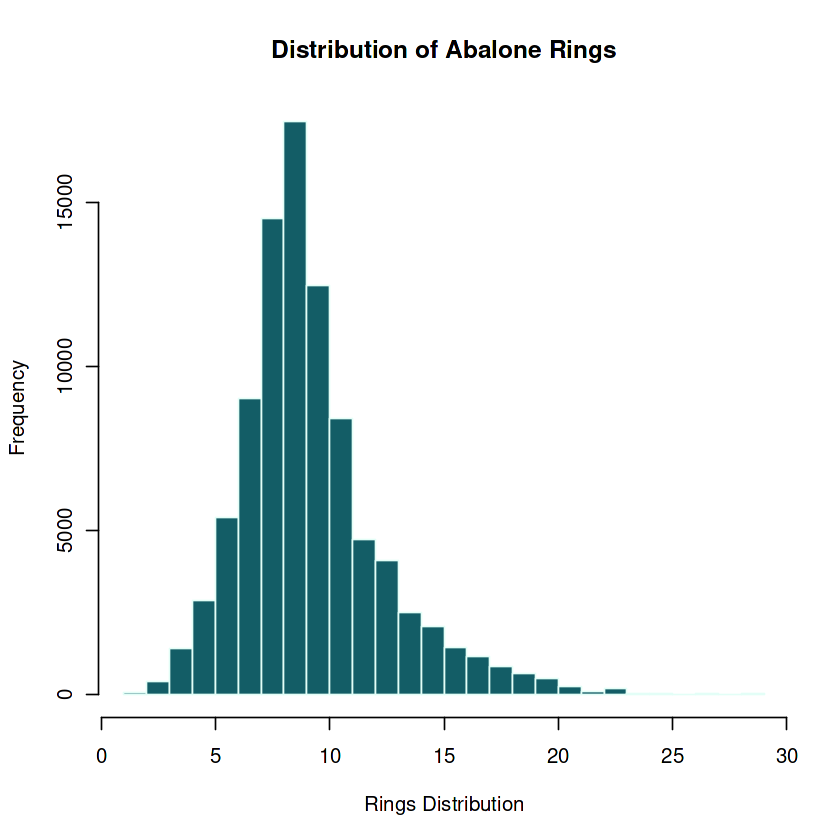

In [9]:
# Distribution of Rings
hist(train_data$Rings,breaks = 20, xlab = "Rings Distribution", main = 'Distribution of Abalone Rings', col = '#135D66', border = '#E3FEF7')

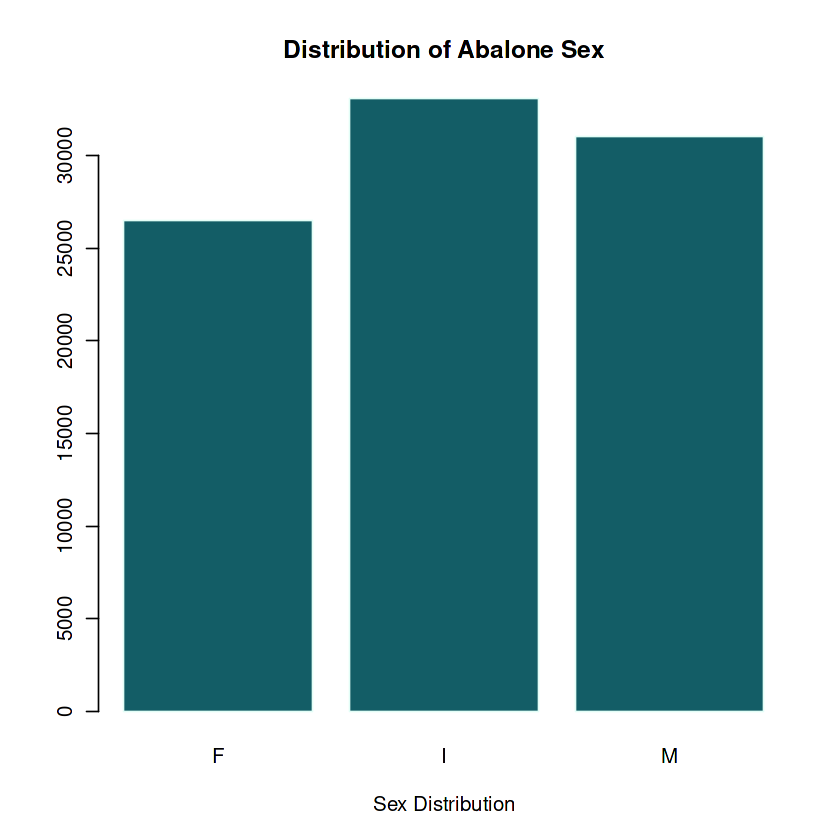

In [10]:
# Distribution of sex
barplot(table(train_data$Sex), xlab = "Sex Distribution", main = 'Distribution of Abalone Sex', col = '#135D66', border = '#E3FEF7')

corrplot 0.92 loaded



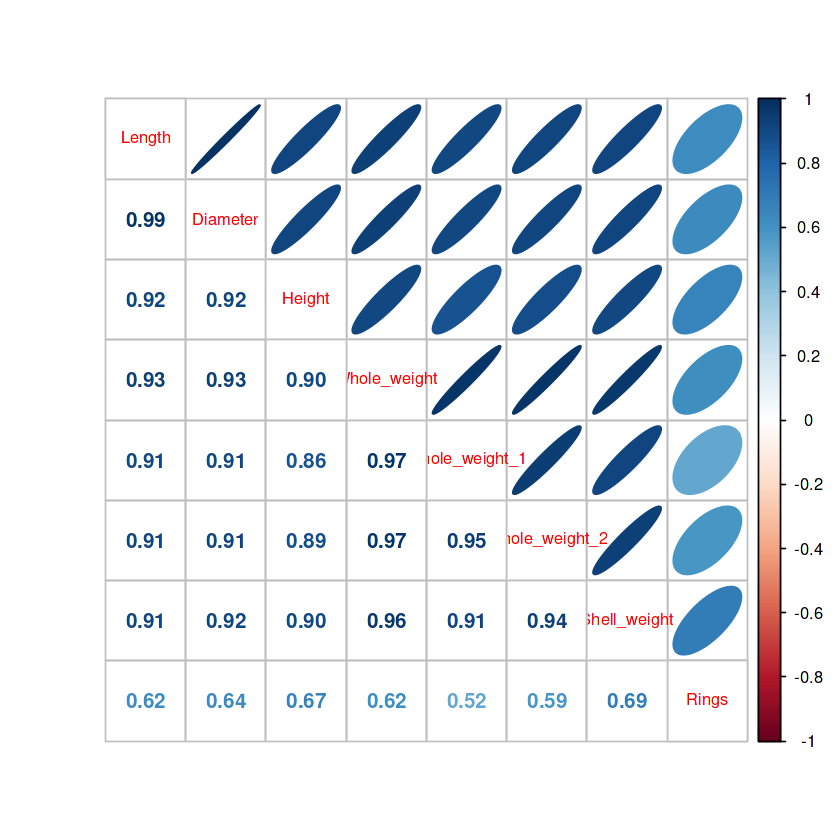

In [11]:
# Draw correlation plot between variables
library(corrplot)
corrplot.mixed(cor(train_data[,-c(1,2)]), upper = 'ellipse', lower = 'number', number.cex = 1, tl.cex = 0.8)

# Modeling

## Ridge Regression

In [12]:
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [13]:
# Set lambda
lambdas = 10^seq(-1.5, 1.5, by = 0.1)
lambdas

[1]  0.03162278  0.03981072  0.05011872  0.06309573  0.07943282  0.10000000
 [7]  0.12589254  0.15848932  0.19952623  0.25118864  0.31622777  0.39810717
[13]  0.50118723  0.63095734  0.79432823  1.00000000  1.25892541  1.58489319
[19]  1.99526231  2.51188643  3.16227766  3.98107171  5.01187234  6.30957344
[25]  7.94328235 10.00000000 12.58925412 15.84893192 19.95262315 25.11886432
[31] 31.62277660

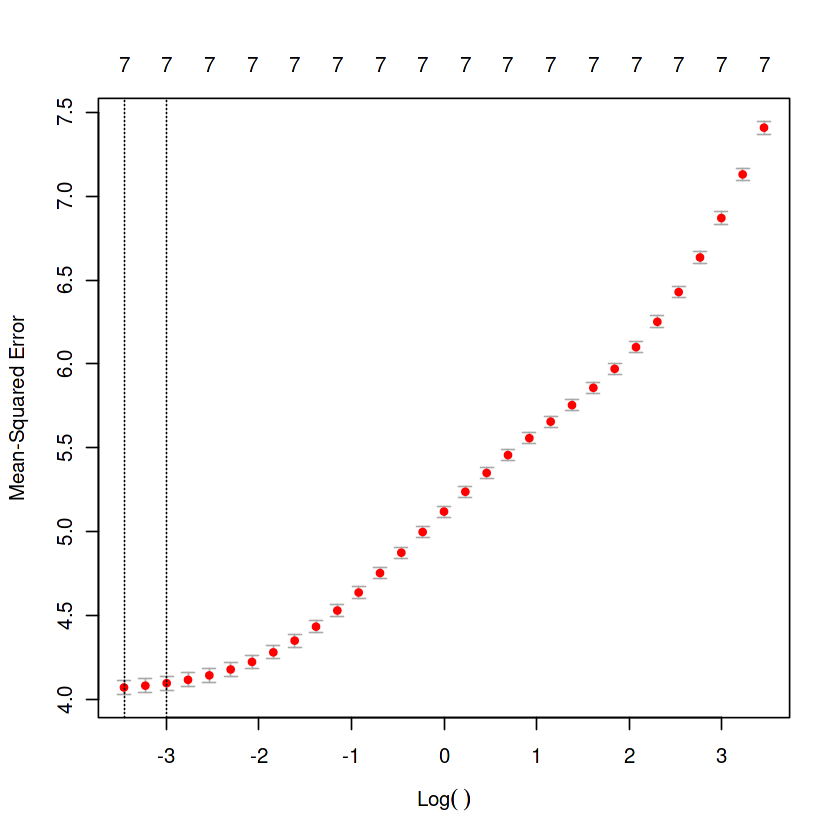

In [14]:
# Fit model using cross validation
cv_fit = cv.glmnet(as.matrix(train_data[,c('Length','Diameter','Height','Whole_weight','Whole_weight_1','Whole_weight_2','Shell_weight')]),
                as.matrix(train_data$Rings),
                alpha = 0, 
                lambda = lambdas)

plot(cv_fit)

In [15]:
# lambda.min is the value of λ that gives minimum mean cross-validated error
cv_fit$lambda.min

[1] 0.03162278

In [16]:
# Return coefficients of the best model
coef(cv_fit, s = 'lambda.min')

8 x 1 sparse Matrix of class "dgCMatrix"
                        s1
(Intercept)      2.6954965
Length          -0.4070918
Diameter         7.1545923
Height          23.7185647
Whole_weight     2.0595746
Whole_weight_1 -13.1352854
Whole_weight_2  -4.1443935
Shell_weight    20.7095058

In [17]:
# Predictions on the training data
predict_best_cv = predict(cv_fit, s = 'lambda.min',
                          newx = as.matrix(train_data[,c('Length','Diameter','Height','Whole_weight','Whole_weight_1','Whole_weight_2','Shell_weight')]))

In [18]:
# Calculate RMSLE
RMSLE_best_cv = sqrt(mean((log(1+predict_best_cv) - log(1+train_data$Rings))^2))
RMSLE_best_cv

[1] 0.1653859

In [19]:
# Prediction on test data
y_pred = predict(cv_fit, s = 'lambda.min',
                 newx = as.matrix(test_data[,c('Length','Diameter','Height','Whole_weight','Whole_weight_1','Whole_weight_2','Shell_weight')]))

In [20]:
# Add new predicted column to the test data
test_data <- test_data %>% mutate(Rings= y_pred)

head(test_data)

id    Sex Length Diameter Height Whole_weight Whole_weight_1 Whole_weight_2
1 90615 M   0.645  0.475    0.155  1.2380       0.6185         0.3125        
2 90616 M   0.580  0.460    0.160  0.9830       0.4785         0.2195        
3 90617 M   0.560  0.420    0.140  0.8395       0.3525         0.1845        
4 90618 M   0.570  0.490    0.145  0.8740       0.3525         0.1865        
5 90619 I   0.415  0.325    0.110  0.3580       0.1575         0.0670        
6 90620 M   0.560  0.425    0.140  0.8105       0.3525         0.1915        
  Shell_weight Rings    
1 0.3005        8.861394
2 0.2750       10.070214
3 0.2405       10.107873
4 0.2350       10.672081
5 0.1050        8.026182
6 0.2150        9.526815

In [21]:
# Create submission file
test_data <- test_data %>% select(c(id, Rings))
head(test_data)

id    Rings    
1 90615  8.861394
2 90616 10.070214
3 90617 10.107873
4 90618 10.672081
5 90619  8.026182
6 90620  9.526815

In [22]:
# Export to csv
write.csv(test_data, 'submission.csv', row.names = FALSE)